# Snake AI - Reinforcement Learning

1) Theory

2) Game implementation (environment)

3) Implement the **Agent**

4) Implement the **Model**

# Theory of Reinforcement Learning

Reinforcement learning (RL) is an area of machine learning concerned with how software agents ought to take actions in an environment in order to maximize the notion of cumulative reward.

In other words, RL is teaching a software agent how to behave in an environment by telling it how good it's doing. There are many methods for RL, but we will use **deep learning**.

## **Deep Q Learning**:
This approach extends reinforcement learning by using a deep neural network to predict the actions.



# Code overview:

The projects consists of 3 parts:

* Agent:
  - game
  - model

  Training:

  - state = get_state(game)
  - action = get_move(game)
    - model.predict()

  - reward, game_over, score = game.play_step(action)
  - new_sate = get_state(game)
  - remember
  - model.train()

* Game (Pygame):
  - play_step(action)
    -> reward, game_over, score

* Model (PyTorch):
  Linear_QNet(DQN):
  - model.predict(state)
    -> action

* Our game has to be designed s.t. we have a **game loop**, each having a **play_step()** that takes as input an **action**, does a step - moves the snake, and returns the current reward, whether game_over or not, and current score.

* The **Agent** puts everything together, i.e. it must know about the game and the model, thus we store both in our agent, and implement the training loop.

* Based on the game, we have to calculate a **state**, and based on the state we calculate the next **action**, which involves calling `model.predict()`, and with this next action, we call the next `play_step()`, getting the game states. With this info, we get the new state and remember all of this (old, new states, scores, game_over, etc). With this, we **then** train our model - Linear Q FF network, which takes the info we remembered.

# Variables: reward, game_over, score

* `reward`:
  - eat food: +10 (whenever snake eats food)
  - game over: -10 (whenever snake dies)
  - else: 0 (for everything else, quite simple)

* `action`:
  - `[1,0,0]` -> straight
  - `[0,1,0]` -> right turn
  - `[0,0,1]` -> left turn

We may design the actions to be right, left, up, down. However, that doesn't make sense as that would be a $180$ degree turn. Instead, we require that actions like right->left be used.
Action is dependent on the **current direction**, i.e. `[1,0,0]` means we stay in the current direction, take a right/left, etc.
Also, thus we only need to predict **3 different states**.
Now that we have the reward and the action, we need to compute the state.

* `state` (11 values):
We need to tell the agent information about the **state** of the game:

`[danger straight, danger right, danger left,`

`direction left, right, up, down`,

`food left, right, up, down ]`

--> All of these are boolean values, e.g.

$\begin{pmatrix} 0&0&0 \\
0 & 1 & 0 & 0  \\
0 & 1 & 0 & 1\end{pmatrix}$



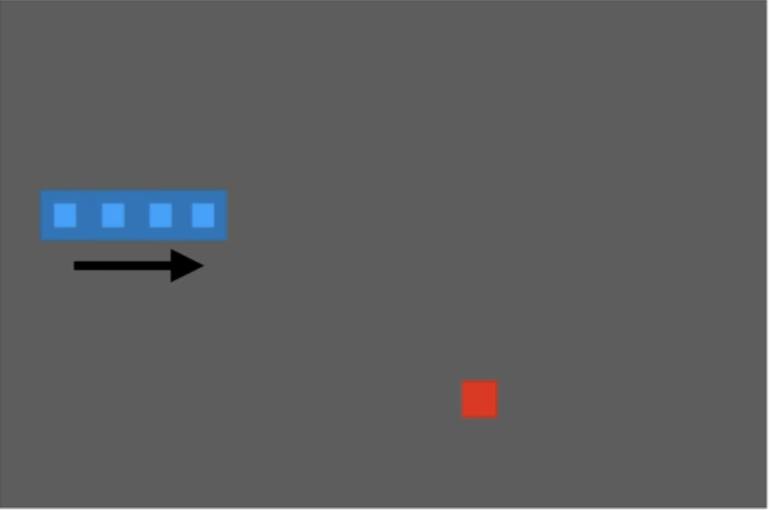

* That means that at that state, there is no danger in any of the directions (immediately none).
  * However, if the snake was nearing the wall in the same direction, danger right would be $1$ - True.
* Direction right is $1$ - True, as the snake is headed **right**.
* There is food in the direction of **right, down**, thus these values are $1$ - True.

The agent needs to know about the **environment**.

# The Model:

* The model is a **Feed Forward Neural Network**, which has input, hidden, and output layers. The **inputs** are the **states** - 11 boolean values. Thus, input size will be 11.

* We can freely choose the number of neurons and layers for the hidden layers.

* For the **outputs**, we need **3 outputs**, not necessarily probabilities, these can be any values - the model will choose the maximum value, e.g. `[5.0, 2.7, 0.1] -> [1,0,0]` means the action will be **straight**, or keep the current direction.


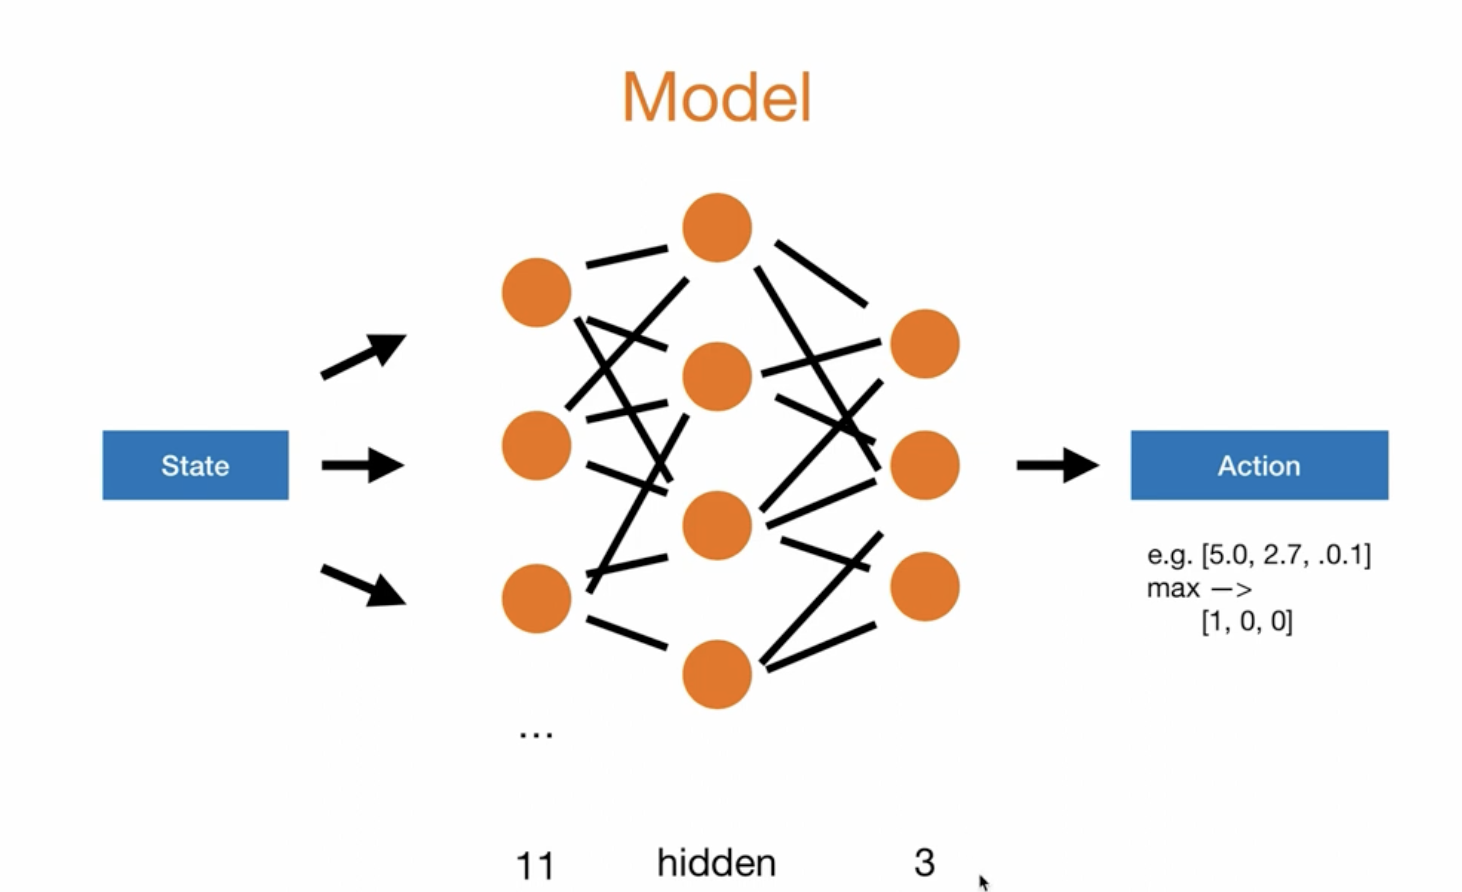

# (Deep) Q Learning:

`Q Value` - **quality of action**. Each action should improve the state of the agent.  

0. Init $Q$ Value(= `init model`) with random params
1. Choose action `(model.predict(state))` or random move when game largely unknown.Later, we perform a **trade-off**, when we only call `model.predict()` and perform no random moves. This is called **trade-off between exploration and exploitation**.
2. Perform action (perform the next move)
3. Measure reward
4. Update $Q$ value (+ train model)

--> **Repeat** steps 1-4, the iterative **training loop**.

# Loss function - *Bellman Equation* :
To train the model, we need some kind of a **loss function**, which in $Q$ Learning is computed with the use of the **Bellman Equation**:

$NewQ(s,a) = Q(s,a) + \alpha \left[R(s,a) + \gamma maxQ'(s', a') - Q(s,a) \right]$

where

* $NewQ(s,a)$ - new $Q$ value for that state and action
* $Q(s,a)$ - current $Q$ value
* $\alpha$ - learning rate
* $R(s,a)$ - reward for taking that action at that state
* $\gamma$ - discount rate parameter
* $maxQ'(s',a')$ - maximum expected future reward **given the new $s'$ and all possible actions at that new state**


Recall that in step 4 we update the $Q$ value, which is computed according to the Bellman equation.

## $Q$ Update Rule Simplified:
* $Q$ = `model.predict(`$state_0$`)`

* $Q _{new}= R + \gamma \cdot max(Q(state_1))$

## Loss Function:
$ loss = (Q_{new} - Q)^2$ - squared error